In [162]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import circlify

In [157]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/11_SevCatOneNumNestedOneObsPerGroup.csv'
df = pd.read_csv(url)
artists = []
song = []
word = []
value = []


In [158]:
for i in range(len(df)):
        artists.append(df.iloc[i][0].split(';')[0])
        song.append(df.iloc[i][0].split(';')[1])
        word.append(df.iloc[i][0].split(';')[2])
        value.append(df.iloc[i][0].split(';')[3])

In [206]:
data = pd.DataFrame()
data['region'] = artists
data['subregion'] = song
data['key'] = word
data['value'] = value

In [256]:
data['value'] = pd.to_numeric(data['value'])
data['value'] = data['value'][data['value'] >= 0]
data = data.sort_values(by = ["region","subregion"],ascending=False)
df = data.iloc[:-4,:]
df = df.dropna()
df

,region,subregion,key,value
4,Oceania,"""Polynesia""","""American Samoa""",55519.0
53,Oceania,"""Polynesia""","""Cook Islands""",14974.0
78,Oceania,"""Polynesia""","""French Polynesia""",268270.0
161,Oceania,"""Polynesia""","""Niue""",1613.0
175,Oceania,"""Polynesia""","""Pitcairn Islands""",56.0
...,...,...,...,...
205,Africa,"""Eastern Africa""","""Somalia""",10496000.0
221,Africa,"""Eastern Africa""","""Tanzania""",44928923.0
233,Africa,"""Eastern Africa""","""Uganda""",35357000.0
248,Africa,"""Eastern Africa""","""Zambia""",13092666.0


# Interactive TreeMap

In [177]:
fig = px.treemap(df, path = ['region','subregion','key'],values='value')
fig.show()

# Circle Packing

In [189]:
df = df.sort_values(by = "value",ascending=False)
#df = df.values
circles = circlify.circlify(
    df, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [182]:
for circle in circles:
    print(circle)

Circle(x=0.019103800165476418, y=0.3994329593500769, r=7.196879451906217e-05, level=1, ex={'datum': 56.0})
Circle(x=0.019402519190123663, y=0.3990684146968102, r=0.00022554414603868285, level=1, ex={'datum': 550.0})
Circle(x=0.020667459050976222, y=0.3955729460982811, r=0.00027201647493506695, level=1, ex={'datum': 800.0})
Circle(x=0.020975249011449277, y=0.399235051186799, r=0.0003612548793434093, level=1, ex={'datum': 1411.0})
Circle(x=0.018709968307936708, y=0.4013394553116775, r=0.0003862490270732555, level=1, ex={'datum': 1613.0})
Circle(x=0.01620064207855629, y=0.40730975780080936, r=0.0004377690866512833, level=1, ex={'datum': 2072.0})
Circle(x=0.020624088931872505, y=0.39630510602812413, r=0.00046142686309465935, level=1, ex={'datum': 2302.0})
Circle(x=0.02126795967500486, y=0.40135980117906533, r=0.0004868828956180378, level=1, ex={'datum': 2563.0})
Circle(x=0.02034802324732498, y=0.39722139284368513, r=0.0004955442914095133, level=1, ex={'datum': 2655.0})
Circle(x=0.022717011

In [ ]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
labels = df['su'].tolist()
for circle,label in zip(circles,labels):
    if circle.level != 3:
      continue
    x, y, r = circle
    #label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))



# Lollipop Plot

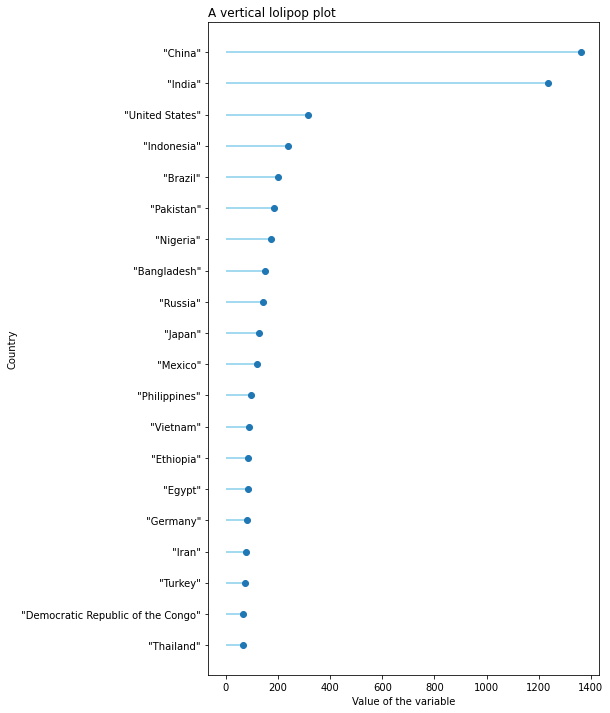

In [201]:
ordered_df = df.sort_values(by='value',ascending=False)

my_range=range(1,21)
ordered_df['value'] = ordered_df['value']/1000000
plt.figure(figsize=(7,12)) 

plt.hlines(y=my_range, xmin=0, xmax=ordered_df['value'].head(20)[::-1], color='skyblue')
plt.plot(ordered_df['value'].head(20)[::-1], my_range, "o")
 
plt.yticks(my_range, ordered_df['key'].head(20)[::-1])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Population')
plt.ylabel('Country')

plt.show()

Text(0, 0.5, 'Country')

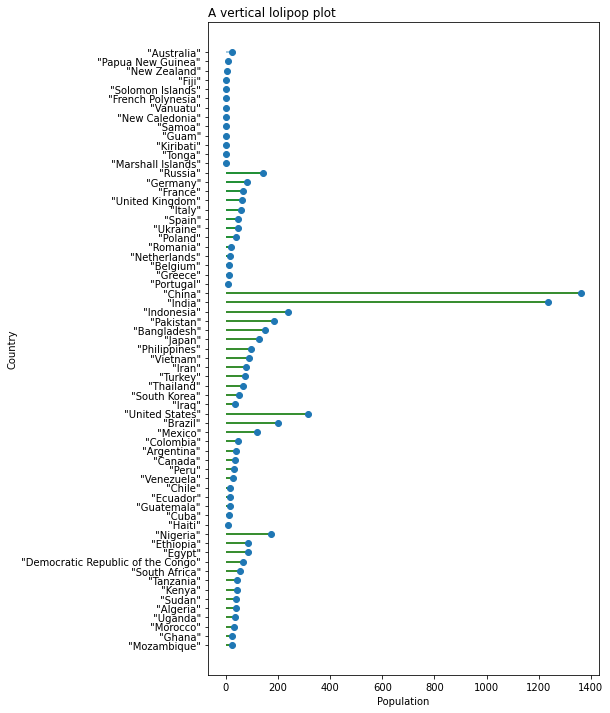

In [255]:
ordered_df = df.sort_values(by = ['region','value'],ascending=False).groupby('region').head(13)
my_range=range(1,len(ordered_df)+1)
ordered_df['value'] = ordered_df['value']/1000000
plt.figure(figsize=(7,12)) 
my_color1=np.where(ordered_df['region']=='Asia' ,'skyblue' , 'orange')
my_color2=np.where(ordered_df['region']=='Europe', 'skyblue', 'red')
my_color3=np.where(ordered_df['region']=='Oceania', 'skyblue', 'skyblue')
my_color4=np.where(ordered_df['region']=='Americas', 'skyblue', 'pink')
my_color5=np.where(ordered_df['region']=='Africa', 'skyblue', 'green')
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['value'][::-1], color=my_color1)
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['value'][::-1], color=my_color2)
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['value'][::-1], color=my_color3)
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['value'][::-1], color=my_color4)
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['value'][::-1], color=my_color5)
plt.plot(ordered_df['value'][::-1], my_range, "o")
 
plt.yticks(my_range, ordered_df['key'][::-1])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Population')
plt.ylabel('Country')

# Circular Version

In [306]:
df2 = df[df['region'] == 'Africa']
df2 = df2.sort_values(by =['subregion',"value"])
df2 = df2[::-1]
df2

,region,subregion,key,value
160,Africa,"""Western Africa""","""Nigeria""",173615000.0
84,Africa,"""Western Africa""","""Ghana""",24658823.0
36,Africa,"""Western Africa""","""Burkina Faso""",17322796.0
159,Africa,"""Western Africa""","""Niger""",17129076.0
135,Africa,"""Western Africa""","""Mali""",15302000.0
196,Africa,"""Western Africa""","""Senegal""",13567338.0
93,Africa,"""Western Africa""","""Guinea""",10824200.0
23,Africa,"""Western Africa""","""Benin""",10323000.0
224,Africa,"""Western Africa""","""Togo""",6191155.0
199,Africa,"""Western Africa""","""Sierra Leone""",6190280.0


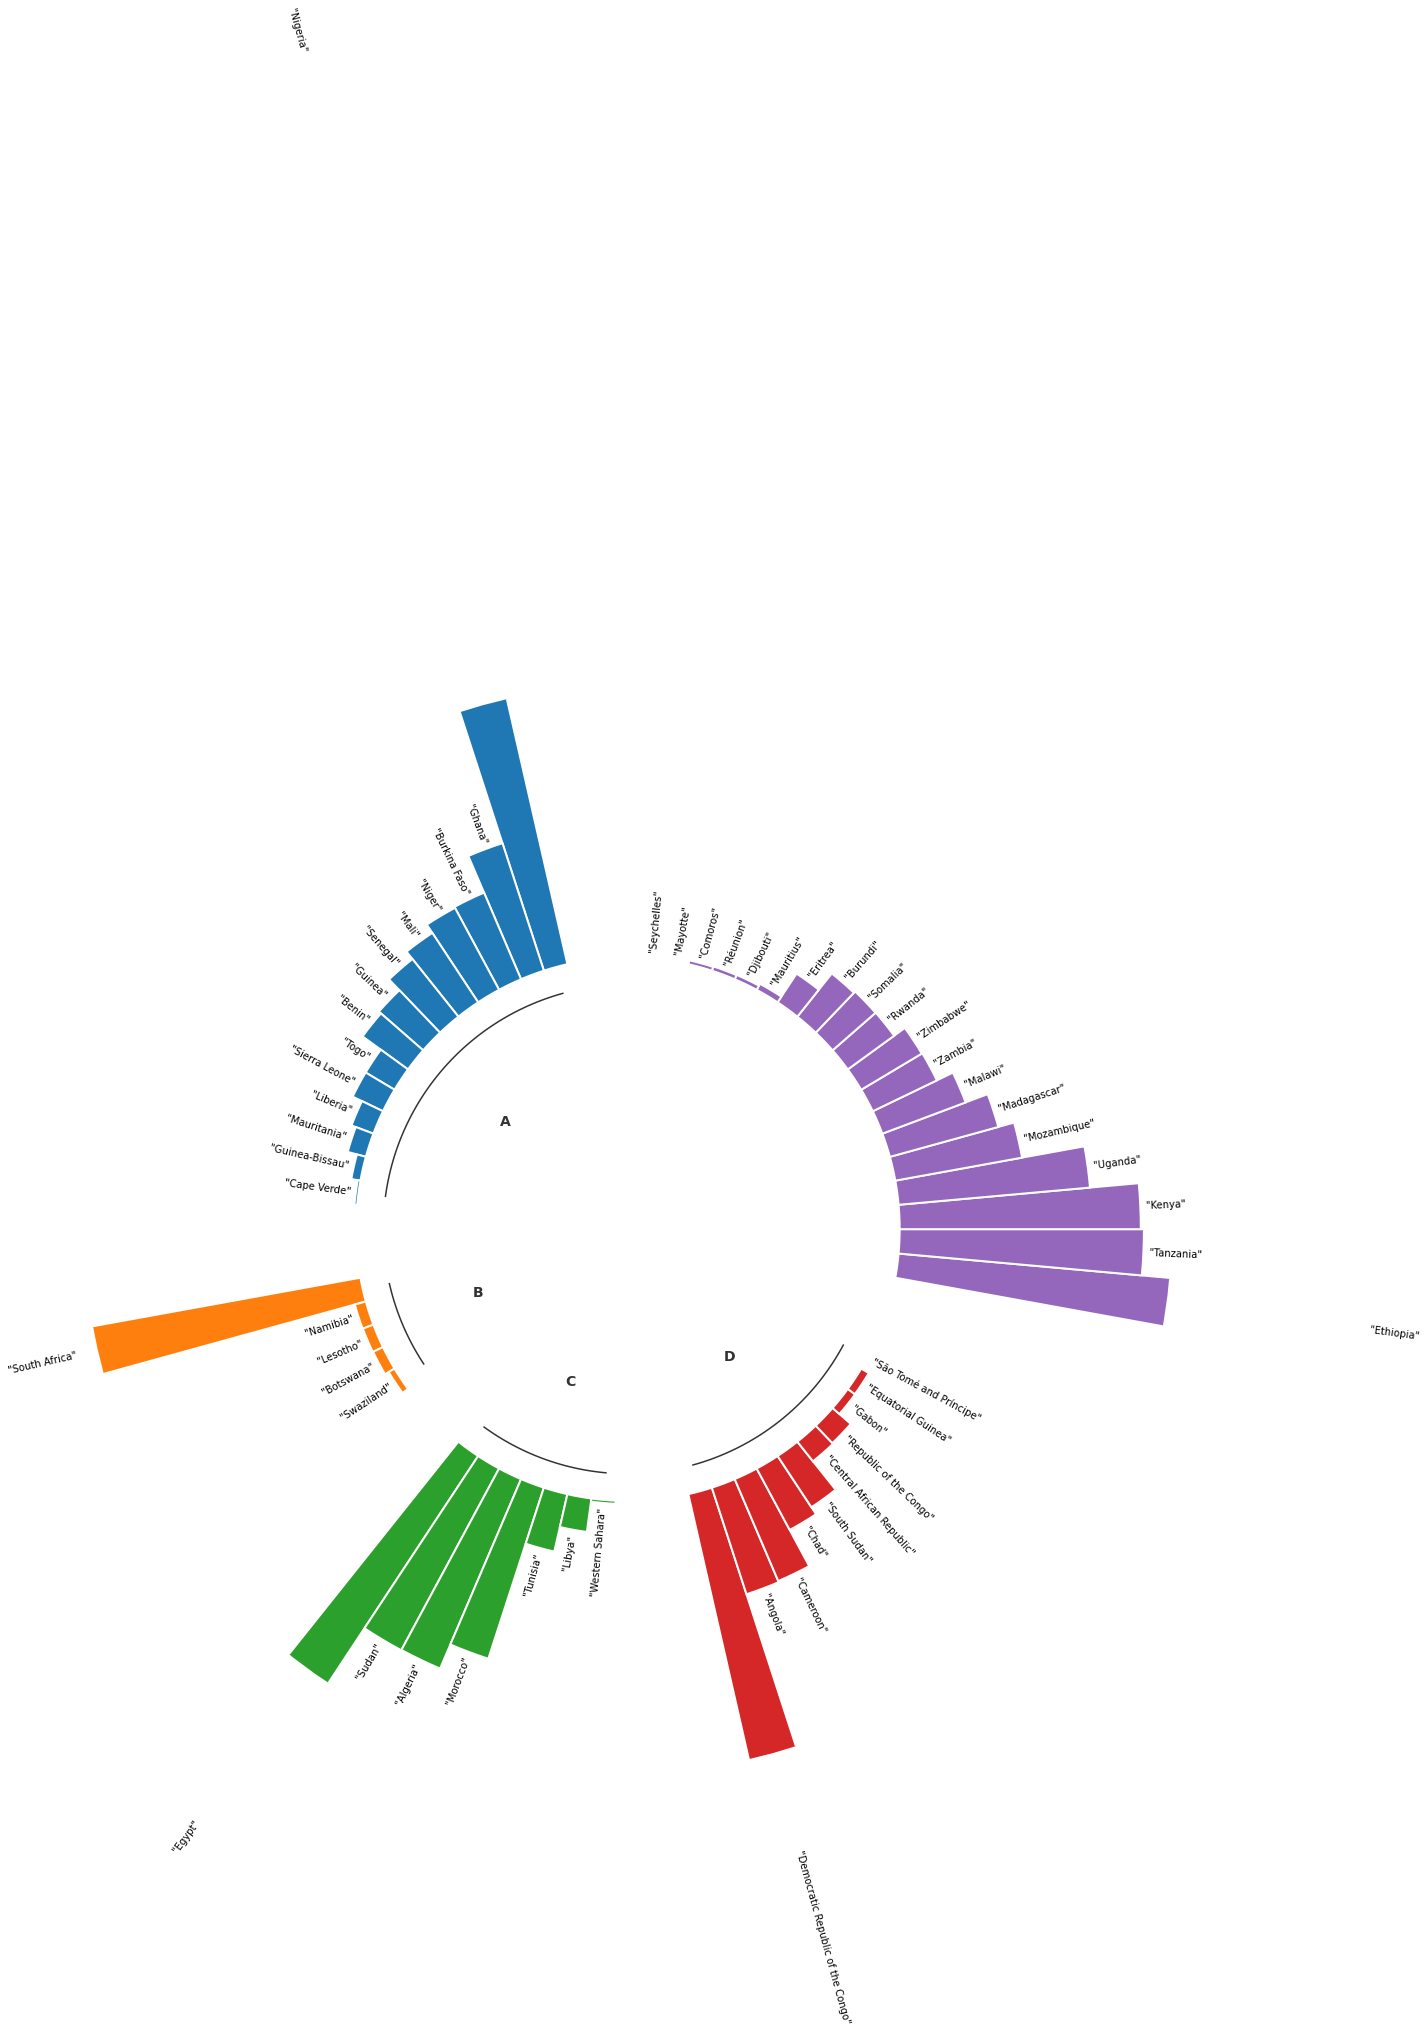

In [310]:
VALUES = df2["value"].values/1000000
LABELS = df2["key"].values
GROUP = ['West','South','North','Middle','East']

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    padding = 1

    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        rotation, alignment = get_label_rotation(angle, offset)

        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
OFFSET = np.pi / 2

offset = 0
IDXS = []
GROUPS_SIZE = [len(df2['subregion'][df2['subregion'] == '"Western Africa"']), len(df2['subregion'][df2['subregion'] == '"Southern Africa"']),len(df2['subregion'][df2['subregion'] == '"Northern Africa"']), len(df2['subregion'][df2['subregion'] == '"Middle Africa"']), len(df2['subregion'][df2['subregion'] == '"Eastern Africa"'])]

for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-50, 50)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(df2['subregion'][df2['subregion'] == '"Western Africa"']), len(df2['subregion'][df2['subregion'] == '"Southern Africa"']),len(df2['subregion'][df2['subregion'] == '"Northern Africa"']), len(df2['subregion'][df2['subregion'] == '"Middle Africa"']), len(df2['subregion'][df2['subregion'] == '"Eastern Africa"'])]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=55)
    ax.plot(x1, [-5] * 55, color="#333333")

    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    offset += size + PAD